# Performance

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [65]:
activity = "./data/database/csv/activity.csv"
df = pd.read_csv(activity)

game_mode = "./data/database/csv/game_mode.csv"
df_game_mode = pd.read_csv(game_mode)

df = df.merge(df_game_mode, left_on="game_mode", right_on="id", how="left")
df["game_mode"] = df["name"]
df = df.drop(columns=["id_x", "name"])
df = df.rename(columns={"id_y": "game_mode_id"})
df['timestamp'] = pd.to_datetime(df['timestamp'])

df

,user,achievement,points,game_mode,timestamp,game_mode_id
0,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 07:03:37.584413,0
1,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:37.608230,0
2,0d271530-be17-4538-bf04-dde3c6069b5f,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:49.222756,0
3,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 07:03:58.246131,0
4,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:58.276464,0
...,...,...,...,...,...,...
13098,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 08:30:03.500172,0
13099,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 08:30:03.521819,0
13100,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 08:30:03.539487,0
13101,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 08:42:15.128917,0


### Add group

In [67]:
df_first = df.sort_values(by=["timestamp"], ascending=True).groupby("user").first().reset_index()
df_first['group'] = df_first['game_mode_id'].map({0: 'A', 1: 'B'})

df_first

,user,achievement,points,game_mode,timestamp,game_mode_id,group
0,0d271530-be17-4538-bf04-dde3c6069b5f,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:49.222756,0,A
1,11555248-3f01-4d1c-9a71-ef7caf9150fa,AddTestsAchievement,1,Leaderboard,2025-04-17 07:20:03.022876,0,A
2,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 07:03:37.584413,0,A
3,1d20c70c-aa71-49ff-abf5-6013870a28f8,AddTestsAchievement,1,Achievements,2025-04-17 07:29:12.764606,1,B
4,1f06f352-91b6-4373-87ed-5a5070723efb,TriggerXAssertsByTestsAchievement,1,Achievements,2025-04-17 07:13:22.469800,1,B
5,223bf16c-aaad-404f-8a47-61f3ced741e4,RefactorXTestNamesAchievement,1,Achievements,2025-04-17 07:07:31.843687,1,B
6,2b2965f7-5d66-4569-802b-27c84aa69bff,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 07:14:16.979084,0,A
7,3e58c347-cdf0-4139-93e0-1adf144753c4,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 07:13:18.003375,0,A
8,465777bf-b8f8-4dbe-b99e-7e1c208be8dc,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 07:07:10.961385,0,A
9,465f4b36-5fbb-415c-8e64-2401771ce91d,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 07:24:13.634656,0,A


### Merge groups with main dataframe

In [68]:
df = df.merge(df_first[['user', 'group']], on='user', how='left')
df

,user,achievement,points,game_mode,timestamp,game_mode_id,group
0,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 07:03:37.584413,0,A
1,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:37.608230,0,A
2,0d271530-be17-4538-bf04-dde3c6069b5f,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:49.222756,0,A
3,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 07:03:58.246131,0,A
4,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 07:03:58.276464,0,A
...,...,...,...,...,...,...,...
13098,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 08:30:03.500172,0,A
13099,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 08:30:03.521819,0,A
13100,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 08:30:03.539487,0,A
13101,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 08:42:15.128917,0,A


## Achievements overview

In [41]:
counts = df["achievement"].value_counts()
counts

achievement
TriggerXAssertsByTestsAchievement     10594
RunXTestSuitesAchievement               908
RefactorAddXAssertionsAchievement       431
AddTestsAchievement                     368
CoverXLinesAchievement                  141
CoverXMethodsAchievement                141
CoverXClassesAchievement                141
RunWithCoverageAchievement              137
RefactorCodeAchievement                 117
CoverXBranchesAchievement                69
RefactorXTestNamesAchievement            52
RefactorExtractXMethodsAchievement        2
RefactorInlineXMethodsAchievement         2
Name: count, dtype: int64

## Runs type

In [55]:
df_run = df[(df["achievement"] == "RunXTestSuitesAchievement") | (df["achievement"] == "RunWithCoverageAchievement")]
df_run

,user,achievement,points,game_mode,timestamp,game_mode_id,group
8,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 07:04:09.168499,0,A
9,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 07:04:09.170740,0,A
16,0d271530-be17-4538-bf04-dde3c6069b5f,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 07:04:24.542848,0,A
20,0d271530-be17-4538-bf04-dde3c6069b5f,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 07:04:36.433767,0,A
21,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 07:04:37.631062,0,A
...,...,...,...,...,...,...,...
12914,11b1644a-d11f-45cb-8a40-282a209059c0,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 08:29:59.095133,0,A
12931,11b1644a-d11f-45cb-8a40-282a209059c0,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 08:29:54.685880,0,A
12934,11b1644a-d11f-45cb-8a40-282a209059c0,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 08:29:56.890680,0,A
12949,11b1644a-d11f-45cb-8a40-282a209059c0,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 08:30:03.539677,0,A


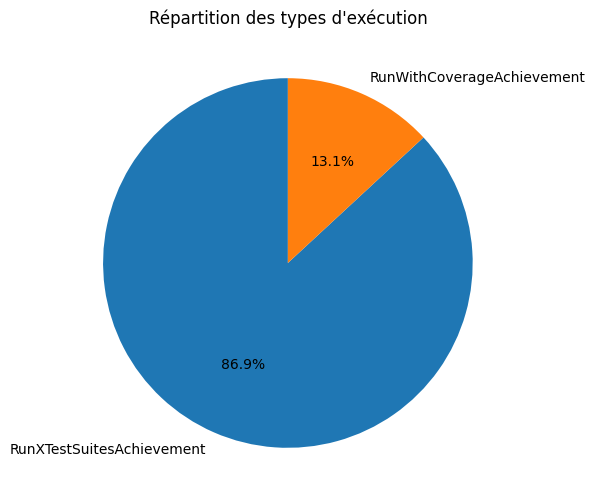

In [56]:
counts = df_run["achievement"].value_counts()

counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)

plt.title("Répartition des types d'exécution")
plt.ylabel("")
plt.show()

## Runs count per type

In [60]:
counts = df_run.groupby(["user", "game_mode"]).size().reset_index(name='count')
counts.groupby("game_mode")["count"].median()

game_mode
Achievements    17.5
Leaderboard     10.0
Name: count, dtype: float64